# Titanic - A machine learning project

In [749]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import f1_score

In [750]:
data = pd.read_csv('train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [751]:
test = pd.read_csv('test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [752]:
data.shape

(891, 12)

In [753]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [754]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [755]:
age_median=data['Age'].median()
print(age_median)
age_mean=data['Age'].mean()
(age_mean)

28.0


29.69911764705882

In [756]:
data['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [757]:
# Replacing the missing values in 'Age' with the mean value
data['Age']=data['Age'].fillna(value=age_mean)
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [758]:
age_median1=test['Age'].median()
print(age_median1)
age_mean1=test['Age'].mean()
(age_mean1)

27.0


30.272590361445783

In [759]:
# Replacing the missing values in 'Age' with the mean value
test['Age']=test['Age'].fillna(value=age_mean)
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [760]:
fare_mean1=test['Fare'].mean()
(fare_mean1)

35.6271884892086

In [761]:
test['Fare']=test['Fare'].fillna(value=fare_mean1)
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [762]:
data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.033207,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,0.033207,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.057527,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


In [763]:
(data.isnull().sum())/891

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

Deleting the entire 'Cabin' column due to high number of missing values

In [764]:
data.drop('Cabin', inplace=True, axis=1)

In [765]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [766]:
test.drop('Cabin', inplace=True, axis=1)

In [767]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [768]:
data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [769]:
embarked_mode = data['Embarked'].mode()[0]
embarked_mode

'S'

In [770]:
data['Embarked'] = data['Embarked'].fillna(value = embarked_mode)

In [771]:
test['Embarked'].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [772]:
embarked_mode1 = test['Embarked'].mode()[0]
embarked_mode1

'S'

In [773]:
test['Embarked'] = test['Embarked'].fillna(value = embarked_mode1)

In [774]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [775]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [776]:
# Removing other irrelevant columns
data.drop('Name', inplace=True, axis=1)
data.drop('Ticket', inplace=True, axis=1)
data.drop('PassengerId', inplace=True, axis=1)

In [777]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [778]:
# Removing other irrelevant columns
test.drop('Name', inplace=True, axis=1)
test.drop('Ticket', inplace=True, axis=1)
test.drop('PassengerId', inplace=True, axis=1)

In [779]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [780]:
data = pd.get_dummies(data)
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [781]:
test = pd.get_dummies(test)
test.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,0,1,0,1,0
1,3,47.0,1,0,7.0000,1,0,0,0,1
2,2,62.0,0,0,9.6875,0,1,0,1,0
3,3,27.0,0,0,8.6625,0,1,0,0,1
4,3,22.0,1,1,12.2875,1,0,0,0,1


In [782]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.352413,0.647587,0.188552,0.086420,0.725028
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429,0.477990,0.477990,0.391372,0.281141,0.446751
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200,0.000000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000


In [783]:
data['Fare'].quantile(0.25), data['Fare'].quantile(0.75)

(7.9104, 31.0)

In [784]:
IQR = data['Fare'].quantile(0.75) - data['Fare'].quantile(0.25)
IQR

23.0896

In [785]:
Q1 = data['Fare'].quantile(0.25)
Q3 = data['Fare'].quantile(0.75)

whisker_1 = Q1 - (1.5*IQR)
whisker_2 = Q3 + (1.5*IQR)

whisker_1, whisker_2

(-26.724, 65.6344)

In [786]:
IQR1 = test['Fare'].quantile(0.75) - test['Fare'].quantile(0.25)
IQR1

23.6042

In [787]:
Q1_1 = test['Fare'].quantile(0.25)
Q3_1 = test['Fare'].quantile(0.75)

whisker_1_1 = Q1_1 - (1.5*IQR1)
whisker_2_1 = Q3_1 + (1.5*IQR1)

whisker_1_1, whisker_2_1

(-27.5105, 66.9063)

### Deleting Outliers

In [788]:
data.loc[data['Fare']>66]

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
1,1,1,38.000000,1,0,71.2833,1,0,1,0,0
27,0,1,19.000000,3,2,263.0000,0,1,0,0,1
31,1,1,29.699118,1,0,146.5208,1,0,1,0,0
34,0,1,28.000000,1,0,82.1708,0,1,1,0,0
52,1,1,49.000000,1,0,76.7292,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
846,0,3,29.699118,8,2,69.5500,0,1,0,0,1
849,1,1,29.699118,1,0,89.1042,1,0,1,0,0
856,1,1,45.000000,1,1,164.8667,1,0,0,0,1
863,0,3,29.699118,8,2,69.5500,1,0,0,0,1


In [789]:
data_new = data.loc[data['Fare']<66]
data.shape, data_new.shape

((891, 11), (775, 11))

In [790]:
test.loc[data['Fare']>66]

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
1,3,47.000000,1,0,7.0000,1,0,0,0,1
27,3,22.500000,0,0,7.2250,0,1,1,0,0
31,2,24.000000,2,0,31.5000,0,1,0,0,1
34,1,30.000000,1,0,57.7500,0,1,1,0,0
52,2,20.000000,2,1,23.0000,1,0,0,0,1
61,2,32.000000,0,0,13.5000,0,1,0,0,1
62,3,18.000000,0,0,7.7500,0,1,0,0,1
72,3,29.000000,0,0,7.9250,1,0,0,0,1
88,3,29.699118,0,0,7.7500,1,0,0,1,0
102,3,29.699118,0,0,7.7500,0,1,0,1,0


In [791]:
test_new = test.loc[test['Fare']<66]
test.shape, test_new.shape

((418, 10), (363, 10))

### Replacing Outliers

In [792]:
data['Fare'].loc[data['Fare']<7]

129    6.9750
143    6.7500
179    0.0000
202    6.4958
263    0.0000
271    0.0000
277    0.0000
302    0.0000
326    6.2375
371    6.4958
378    4.0125
411    6.8583
413    0.0000
466    0.0000
481    0.0000
597    0.0000
633    0.0000
654    6.7500
674    0.0000
732    0.0000
804    6.9750
806    0.0000
815    0.0000
818    6.4500
822    0.0000
825    6.9500
843    6.4375
872    5.0000
Name: Fare, dtype: float64

In [793]:
data['Fare'].loc[data['Fare']<7] = Q1

In [794]:
data['Fare'].loc[data['Fare']<7]

Series([], Name: Fare, dtype: float64)

In [795]:
data['Fare'][872]

7.9104

In [796]:
test['Fare'].loc[test['Fare']<7]

21     3.1708
116    6.4375
133    6.4375
232    6.4958
266    0.0000
291    6.9500
372    0.0000
Name: Fare, dtype: float64

In [797]:
test['Fare'].loc[test['Fare']<7] = Q1_1

In [798]:
test['Fare'].loc[test['Fare']<7]

Series([], Name: Fare, dtype: float64)

In [799]:
test.isnull().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

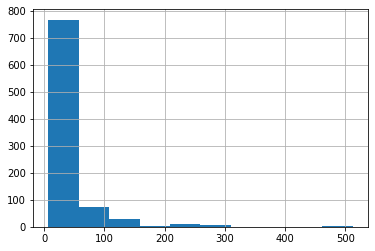

In [800]:
%matplotlib inline
(data['Fare']).hist()

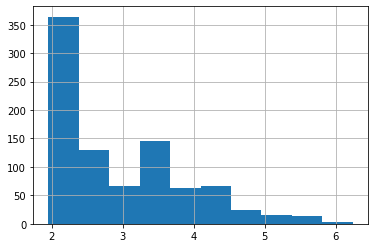

In [801]:
(np.log(data['Fare'])).hist()

In [802]:
data=pd.get_dummies(data, columns=['Pclass','Parch','SibSp'])
data.head()

,Survived,Age,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,...,Parch_4,Parch_5,Parch_6,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8
0,0,22.0,7.2500,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,1,38.0,71.2833,1,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,26.0,7.9250,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
3,1,35.0,53.1000,1,0,0,0,1,1,0,...,0,0,0,0,1,0,0,0,0,0
4,0,35.0,8.0500,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [803]:
test=pd.get_dummies(test, columns=['Pclass','Parch','SibSp'])
test.head()

,Age,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,...,Parch_5,Parch_6,Parch_9,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8
0,34.5,7.8292,0,1,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1,47.0,7.0000,1,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,62.0,9.6875,0,1,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
3,27.0,8.6625,0,1,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,22.0,12.2875,1,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [804]:
test['Parch_9'].value_counts()

0    416
1      2
Name: Parch_9, dtype: int64

In [805]:
# 'Parch_9' can be dropped from the test dataset
test.drop('Parch_9', inplace=True, axis=1)

In [806]:
test

,Age,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,...,Parch_4,Parch_5,Parch_6,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8
0,34.500000,7.8292,0,1,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1,47.000000,7.0000,1,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,62.000000,9.6875,0,1,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
3,27.000000,8.6625,0,1,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,22.000000,12.2875,1,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,29.699118,8.0500,0,1,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
414,39.000000,108.9000,1,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
415,38.500000,7.2500,0,1,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
416,29.699118,8.0500,0,1,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [807]:
#seperating independent and dependent variables
x = data.drop(['Survived'], axis=1)
y = data['Survived']
x.shape, y.shape

((891, 24), (891,))

In [808]:
## Scaling the columns in train
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [809]:
x = pd.DataFrame(x_scaled, columns = x.columns)
x.head()

,Age,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,...,Parch_4,Parch_5,Parch_6,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8
0,0.271174,0.000404,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.472229,0.127132,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.321438,0.001740,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.434531,0.091145,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.434531,0.001987,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


### Implementing KNN Classifier

In [810]:
# Importing the train test split function
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y, random_state = 56, stratify=y)

In [811]:
# Creating instance of KNN
clf = KNN(n_neighbors = 10)

# Fitting the model
clf.fit(train_x, train_y)

# Predicting over the Train Set and calculating F1
test_predict = clf.predict(test_x)
k = f1_score(test_predict, test_y)
print('Test F1 Score    ', k )

Test F1 Score     0.6956521739130435


### Elbow for Classifier

In [812]:
def Elbow(K):
    #initiating empty list
    test_error = []
   
    #training model for evey value of K
    for i in K:
        #Instance oh KNN
        clf = KNN(n_neighbors = i)
        clf.fit(train_x, train_y)
        # Appending F1 scores to empty list claculated using the predictions
        tmp = clf.predict(test_x)
        tmp = f1_score(tmp,test_y)
        error = 1-tmp
        test_error.append(error)
    
    return test_error

In [813]:
#Defining K range
k = range(6, 20, 2)

In [814]:
# calling above defined function
test_e = Elbow(k)

Text(0.5, 1.0, 'Elbow Curve for test')

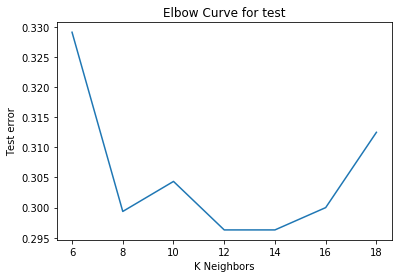

In [815]:
# plotting the Curves
plt.plot(k, test_e)
plt.xlabel('K Neighbors')
plt.ylabel('Test error')
plt.title('Elbow Curve for test')

In [816]:
# Creating instance of KNN
clf = KNN(n_neighbors = 12)

# Fitting the model
clf.fit(train_x, train_y)

# Predicting over the Train Set and calculating F1
test_predict = clf.predict(test_x)
k = f1_score(test_predict, test_y)
print('Test F1 Score    ', k )

Test F1 Score     0.7037037037037037


In [818]:
# testing the given test.csv
test_predict1 = clf.predict(test)

## Thus, this model gives 70% accuracy